In [23]:
import os
import scipy.io
import matplotlib.pyplot as plt

# Path to your .mat file
mat_file_path = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/LV Ground-truth Segmentation Masks/Mask_ES000108 _4CH_1.mat'

# Load the .mat file
mat_data = scipy.io.loadmat(mat_file_path)
print("Keys in .mat file:", mat_data.keys())

# Loop through all actual data keys (skip metadata)
for key in mat_data:
    if not key.startswith('__'):  # Skip meta keys like '__header__', '__globals__', '__version__'
        value = mat_data[key]
        print(f"\nKey: {key}")
        print(f"Type: {type(value)}")
        print(f"Shape: {getattr(value, 'shape', 'No shape')}")
        print(f"Sample data:\n{value}")
        
#         # Plot the segmentation mask
#         plt.imshow(value, cmap='gray')
#         plt.title(f"Segmentation Mask - Key: {key}")
#         plt.axis('off')
#         plt.show()

Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'predicted'])

Key: predicted
Type: <class 'numpy.ndarray'>
Shape: (16, 224, 224)
Sample data:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0.

In [25]:
import cv2

# Path to your .avi file
video_path = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/HMC-QU/A4C/ES000107 _4CH_1.avi'  # Replace with actual path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Cannot open video file.")
else:
    # Get total number of frames
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Number of frames in the video: {frame_count}")

# Release the video capture object
cap.release()

fps = cap.get(cv2.CAP_PROP_FPS)
# duration = frame_count / fps
# print(f"FPS: {fps}")
# print(f"Duration (seconds): {duration}")


Number of frames in the video: 61


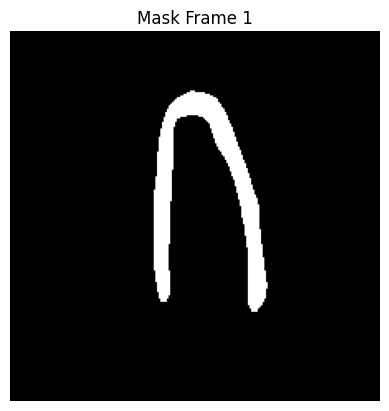

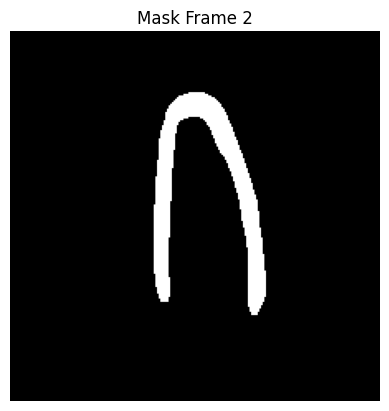

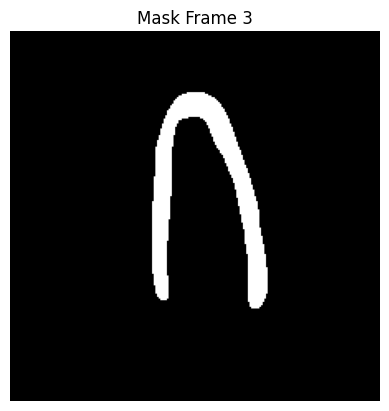

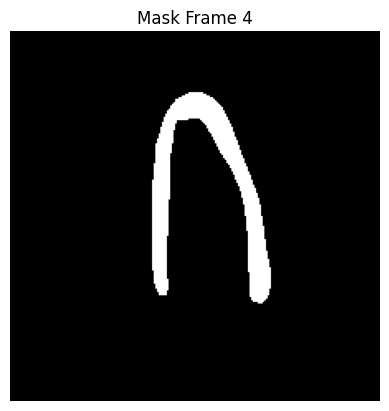

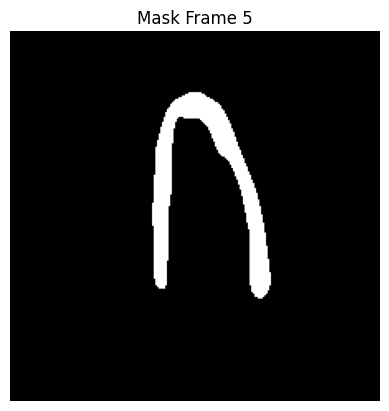

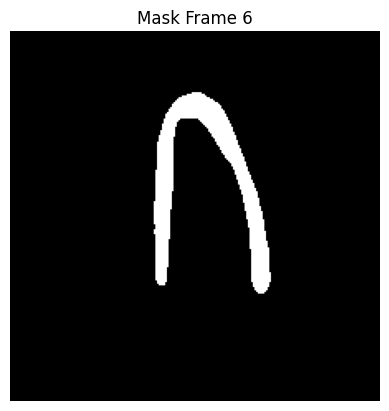

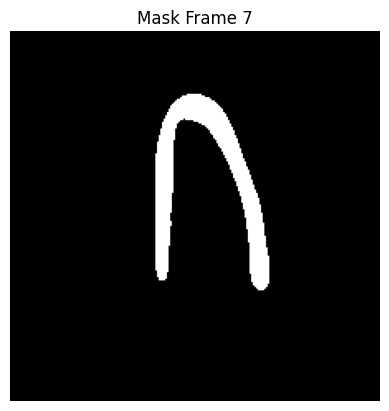

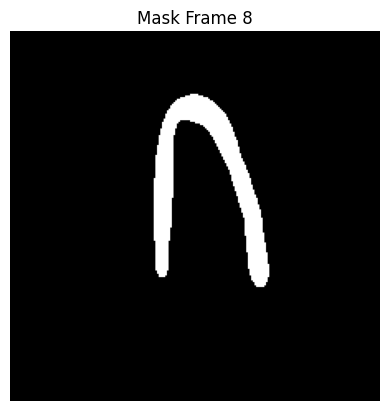

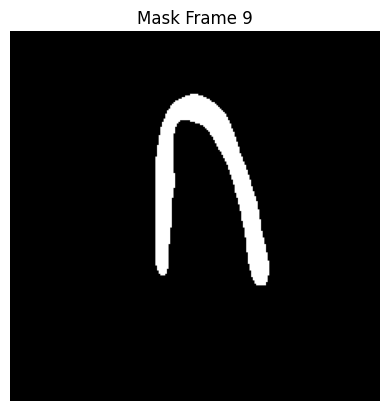

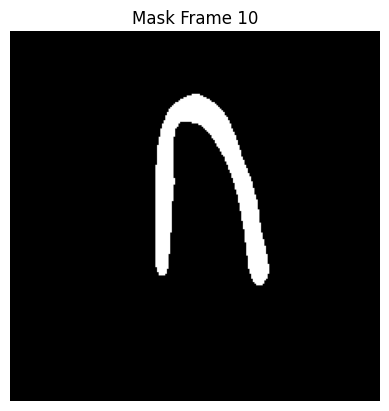

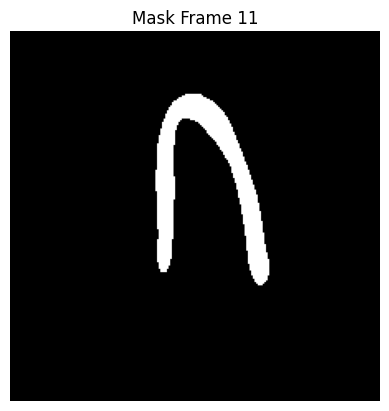

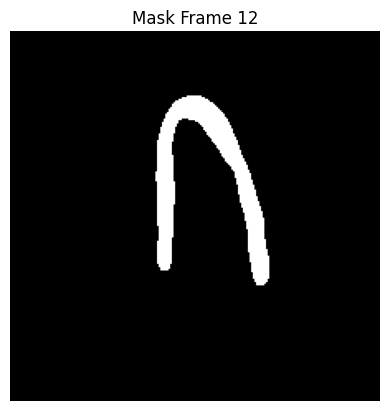

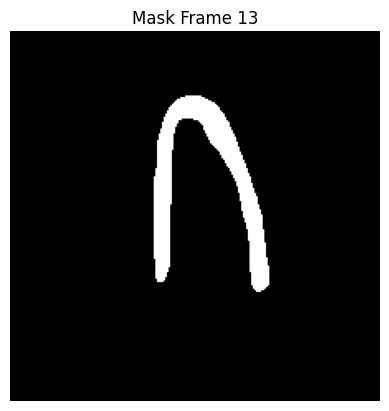

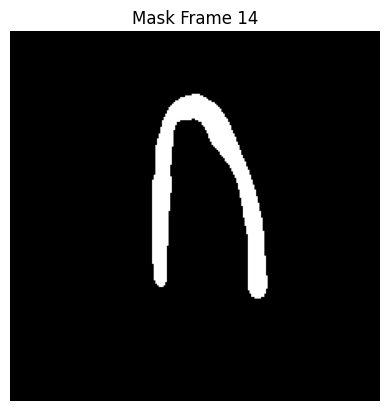

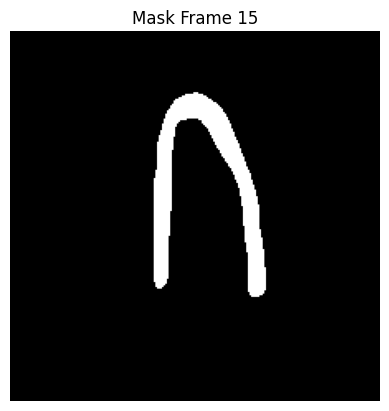

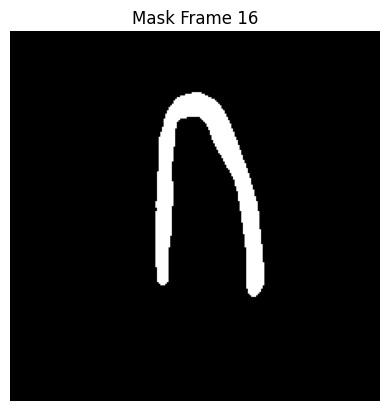

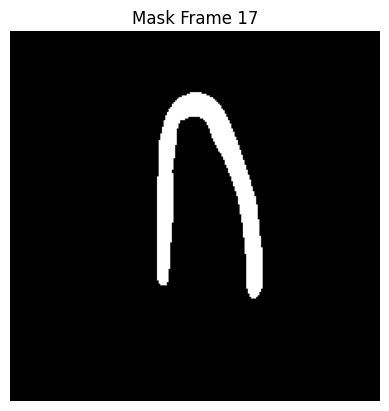

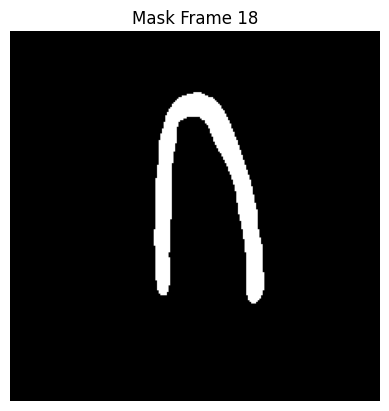

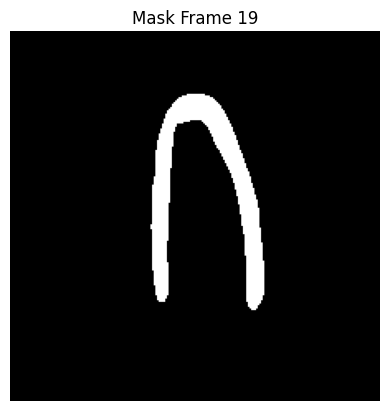

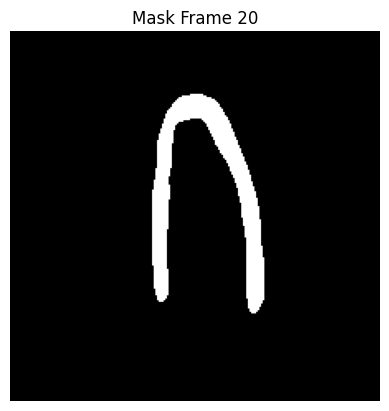

In [27]:
import scipy.io
import matplotlib.pyplot as plt

def plot_mask_frames(mat_path):
    """
    Load and plot each frame of the segmentation mask in the .mat file with shape (N, H, W).
    """
    data = scipy.io.loadmat(mat_path)
    keys = [key for key in data if not key.startswith("__")]
    
    if not keys:
        raise ValueError("No valid keys in the .mat file.")
    
    mask_array = data[keys[0]]

    if mask_array.ndim == 3:
        for i in range(mask_array.shape[0]):  # N, H, W
            plt.imshow(mask_array[i, :, :], cmap='gray')
            plt.title(f"Mask Frame {i+1}")
            plt.axis('off')
            plt.show()
    elif mask_array.ndim == 2:
        plt.imshow(mask_array, cmap='gray')
        plt.title("Mask Frame 1")
        plt.axis('off')
        plt.show()
    else:
        raise ValueError(f"Unexpected shape in mask: {mask_array.shape}")

# Example usage
mask_path = "/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/LV Ground-truth Segmentation Masks/Mask_ES0001 _4CH_1.mat"
plot_mask_frames(mask_path)

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

# Paths
video_folder = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/HMC-QU/A4C'         # Path to .avi folder
excel_path = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/A4C.xlsx'      # Path to Excel
output_folder = '/kaggle/working/extracted_frames'     # Output folder

os.makedirs(output_folder, exist_ok=True)

# Load Excel
df = pd.read_excel(excel_path)

# Handle merged column by selecting proper sub-columns
ref_col = 'Reference Frame'
end_col = 'End of Cycle'
video_name_col = 'ECHO'  # Add this if your Excel includes video names

for idx, row in df.iloc[2:111].iterrows():
    video_name = row[video_name_col] + '.avi'  # e.g., 'ES0001.avi'
    a = int(row[ref_col])
    b = int(row[end_col])

    video_path = os.path.join(video_folder, video_name)
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Could not open {video_name}")
        continue

    frame_list = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if a <= frame_idx <= b:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_list.append(frame_rgb)

        frame_idx += 1

    cap.release()

    # Convert to NumPy and save
    frame_array = np.array(frame_list)
    np.savez_compressed(os.path.join(output_folder, f"{video_name}_frames.npz"), frames=frame_array)

    print(f"Extracted {len(frame_list)} frames from {video_name} ({a} to {b})")



In [1]:
import cv2

# Load .avi video
cap = cv2.VideoCapture('/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/HMC-QU/A4C/ES0004 _4CH_1.avi')

# Read the first frame
ret, frame = cap.read()

if not ret:
    print("Failed to read video.")
else:
    if len(frame.shape) == 2:
        print("Grayscale video (2D frame).")
    elif len(frame.shape) == 3:
        channels = frame.shape[2]
        if channels == 1:
            print("Grayscale (1 channel).")
        elif channels == 3:
            print("Color video (likely RGB/BGR).")
        elif channels == 4:
            print("Color video with alpha (RGBA/BGRA).")
        else:
            print(f"Unknown format with {channels} channels.")
    else:
        print("Unknown frame shape:", frame.shape)

cap.release()


Color video (likely RGB/BGR).


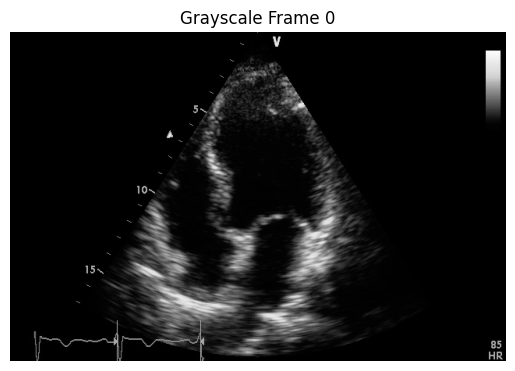

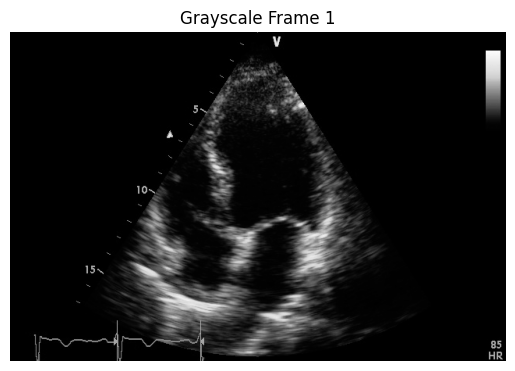

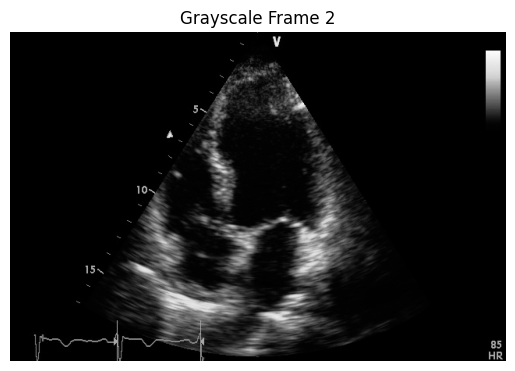

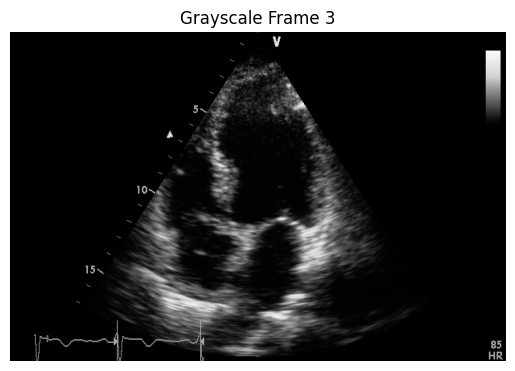

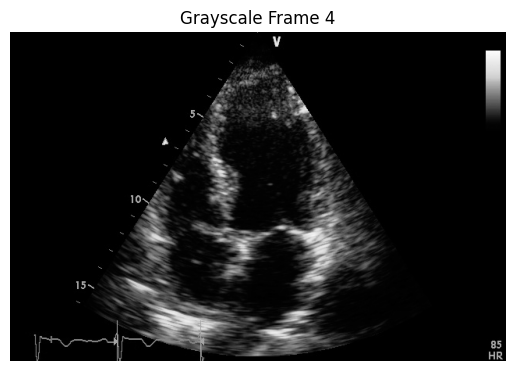

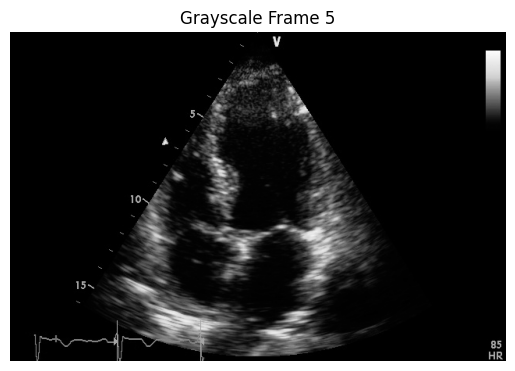

Total grayscale frames captured: 6


In [1]:
import cv2
import matplotlib.pyplot as plt

# Open the video
cap = cv2.VideoCapture('/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/HMC-QU/A4C/ES0004 _4CH_1.avi')

# Store grayscale frames as NumPy arrays
grayscale_frames = []

frame_count = 0  # just to avoid plotting all 50 frames

while True:
    ret, frame = cap.read()
    if not ret or frame_count > 5:  # Show only first 5 frames
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    grayscale_frames.append(gray)

    # Show the frame using matplotlib
    plt.imshow(gray, cmap='gray')
    plt.title(f'Grayscale Frame {frame_count}')
    plt.axis('off')
    plt.show()

    frame_count += 1

cap.release()
print(f"Total grayscale frames captured: {len(grayscale_frames)}")



In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
video_folder = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/HMC-QU/A4C'
excel_path = '/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/A4C.xlsx'
output_folder = '/kaggle/working'  # Store .npz files here

# Load Excel
df = pd.read_excel(excel_path)
ref_col = 'Reference Frame'
end_col = 'End of Cycle'
video_name_col = 'ECHO'

# Iterate over relevant rows (skip headers)
for idx, row in df.iloc[2:111].iterrows():
    video_name = row[video_name_col] + '.avi'
    a = int(row[ref_col])
    b = int(row[end_col])

    video_path = os.path.join(video_folder, video_name)
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f" Could not open {video_name}")
        continue

    # Read first frame to determine if it's grayscale
    ret, first_frame = cap.read()
    if not ret:
        print(f" Could not read first frame of {video_name}")
        cap.release()
        continue

    is_grayscale = len(first_frame.shape) == 2 or (len(first_frame.shape) == 3 and first_frame.shape[2] == 1)

    # Reset capture to beginning
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    frame_list = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if a <= frame_idx <= b:
            if not is_grayscale:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_list.append(frame)

        frame_idx += 1

    cap.release()

    if not frame_list:
        print(f" No frames extracted from {video_name}")
        continue
        
    frame_array = np.array(frame_list)  # shape: (num_frames, height, width)
    all_video_frames.append(frame_array)

    print(f"Shape of {video_name}_frames.npz: {frame_array.shape}")

    # Save this video’s frames as a .npz file
    save_path = os.path.join(output_folder, f"{video_name}_frames.npz")
    np.savez_compressed(save_path, frames=frame_array)

    print(f"Saved {len(frame_list)} grayscale frames from {video_name} to {save_path}")

# Now all frames of all videos are in all_video_frames list
final_array = np.array(all_video_frames)  # Shape: (num_videos, num_frames_per_video, height, width)
print(f"Final shape of all video frames: {final_array.shape}")

In [6]:
import pandas as pd
df = pd.read_excel('/kaggle/input/myocardial-infarction/HMC-QU Dataset-Kaggle/A4C.xlsx', header=None)

# Manually set the correct column names
df.columns = ['ECHO','SEG3','SEG9','SEG14','SEG16','SEG12','SEG6','Reference Frame','End of Cycle','LV Wall Ground-truth Segmentation Masks']
reference_frame_column = df['Reference Frame']

# Print the extracted column
print(reference_frame_column)

0      One cardiac-cycle frames
1               Reference Frame
2                             1
3                             1
4                             1
                 ...           
159                           1
160                          35
161                           1
162                           1
163                           1
Name: Reference Frame, Length: 164, dtype: object


In [7]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('/kaggle/input/processed-data/data/encoder_training/frame_000000.png').convert('L')  # or 'L' for grayscale

# Convert to NumPy array
img_array = np.array(img)

# Check data type and value range
print("Data type:", img_array.dtype)
print("Min pixel value:", img_array.min())
print("Max pixel value:", img_array.max())

# Check normalization
if img_array.max() <= 1.0:
    print("The image appears to be normalized to [0, 1].")
else:
    print("The image is NOT normalized (still in [0, 255] range).")

Data type: uint8
Min pixel value: 0
Max pixel value: 255
The image is NOT normalized (still in [0, 255] range).


In [6]:
import torch

device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)
# Optional: Force GPU/CPU usage
if tf.config.list_physical_devices('GPU'):
    device = '/GPU:0'
    print("Using GPU")
else:
    device = '/CPU:0'
    print("Using CPU")

# Train the model on the selected device


cuda
Using GPU


In [7]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 16
EPOCHS = 50

# Set paths
image_dir = '/kaggle/input/processed-data/data/encoder_training'
mask_dir = '/kaggle/input/processed-data/data/decoder_training'

# Load all image and mask file paths
image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir)])
mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)])

def load_and_resize(path, size=(IMG_HEIGHT, IMG_WIDTH)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    img = img.astype('float32') / 255.0
    return np.expand_dims(img, axis=-1)  # (256, 256, 1)

# Sanity check
sample_img = load_and_resize(image_paths[0])
print("Image shape:", sample_img.shape)


train_imgs, temp_imgs, train_masks, temp_masks = train_test_split(
    image_paths, mask_paths, test_size=0.30, random_state=42)

val_imgs, test_imgs, val_masks, test_masks = train_test_split(
    temp_imgs, temp_masks, test_size=0.50, random_state=42)


class DataGenerator(Sequence):
    def __init__(self, img_paths, mask_paths, batch_size=BATCH_SIZE, img_size=(IMG_HEIGHT, IMG_WIDTH)):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.img_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_imgs = self.img_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_masks = self.mask_paths[index*self.batch_size:(index+1)*self.batch_size]

        X = np.zeros((len(batch_imgs), *self.img_size, 1), dtype=np.float32)
        y = np.zeros((len(batch_masks), *self.img_size, 1), dtype=np.float32)

        for i, (img_path, mask_path) in enumerate(zip(batch_imgs, batch_masks)):
            X[i] = load_and_resize(img_path)
            y[i] = load_and_resize(mask_path)
            y[i] = (y[i] > 0).astype(np.float32)  # Binarize mask

        return X, y


train_gen = DataGenerator(train_imgs, train_masks)
# train_gen.to(device)
val_gen = DataGenerator(val_imgs, val_masks)
test_gen = DataGenerator(test_imgs, test_masks)



Image shape: (256, 256, 1)


In [8]:
from tensorflow.keras.models import Model, load_model
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize



def resblock(X, f):


  # make a copy of input
  X_copy = X

  # main path
  # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Short path
  # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

input_shape = (256,256,1)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )
model_seg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │            544 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 32)   │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 32)   │            544 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 128, 128, 32)   │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 128, 128, 32)   │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 32)   │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)       

 Total params: 1,210,225 (4.62 MB)

 Trainable params: 1,205,841 (4.60 MB)

 Non-trainable params: 4,384 (17.12 KB)

In [10]:
def tversky(y_true, y_pred, smooth = 1e-6):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])
with tf.device(device):
    model_seg.fit(
        train_gen,
        epochs=EPOCHS
    )



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746216430.935777      91 service.cc:148] XLA service 0x7e52f4004eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746216430.936619      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746216433.383772      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/103 ━━━━━━━━━━━━━━━━━━━━ 1:15:52 45s/step - loss: 0.8993 - tversky: 0.1320

I0000 00:00:1746216446.746902      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103/103 ━━━━━━━━━━━━━━━━━━━━ 93s 474ms/step - loss: 0.7648 - tversky: 0.2984 - val_loss: 0.8306 - val_tversky: 0.2192
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - loss: 0.3163 - tversky: 0.7806 - val_loss: 0.6965 - val_tversky: 0.3825
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - loss: 0.1462 - tversky: 0.9229 - val_loss: 0.6789 - val_tversky: 0.4032
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - loss: 0.1222 - tversky: 0.9392 - val_loss: 0.5381 - val_tversky: 0.5621
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - loss: 0.1079 - tversky: 0.9485 - val_loss: 0.2370 - val_tversky: 0.8531
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - loss: 0.1020 - tversky: 0.9523 - val_loss: 0.1364 - val_tversky: 0.9298
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0980 - tversky: 0.9548 - val_loss: 0.1053 - val_tversky: 0.9502
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 0.0927 - tversky: 0.9580 - val_loss: 0.0979 -

In [ ]:
# history = model_seg.fit(train_gen,epochs=50)